In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Tools.scripts.generate_token import make_py

In [269]:
df=pd.read_csv('Data/heart_processed.csv')

In [270]:
df.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [271]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [272]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [273]:
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

In [274]:
df.shape[0]

918

In [275]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

In [276]:
df.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                  int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
RestingECG_Normal      int64
RestingECG_ST          int64
ExerciseAngina_Y       int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  RestingECG_Normal  918 non-null    int64  
 12  RestingECG_ST      918 non-null    int64  
 13  ExerciseAngina_Y   918 non-null    int64  
 14  ST_Slope_Flat      918 non-null    int64  
 15  ST_Slope_Up        918 non-null    int64  
dtypes: float64(1), int64(15)
m

In [278]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [279]:
df.nunique()

Age                   50
RestingBP             67
Cholesterol          222
FastingBS              2
MaxHR                119
Oldpeak               53
HeartDisease           2
Sex_M                  2
ChestPainType_ATA      2
ChestPainType_NAP      2
ChestPainType_TA       2
RestingECG_Normal      2
RestingECG_ST          2
ExerciseAngina_Y       2
ST_Slope_Flat          2
ST_Slope_Up            2
dtype: int64

In [280]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


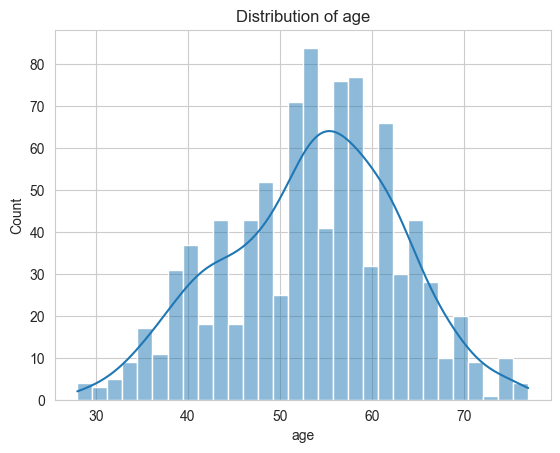

In [281]:

sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribution of age")
plt.xlabel("age")
plt.show()


In [282]:
male_percentage=(df["Sex_M"].sum()/df.shape[0])*100
male_percentage

np.float64(78.9760348583878)

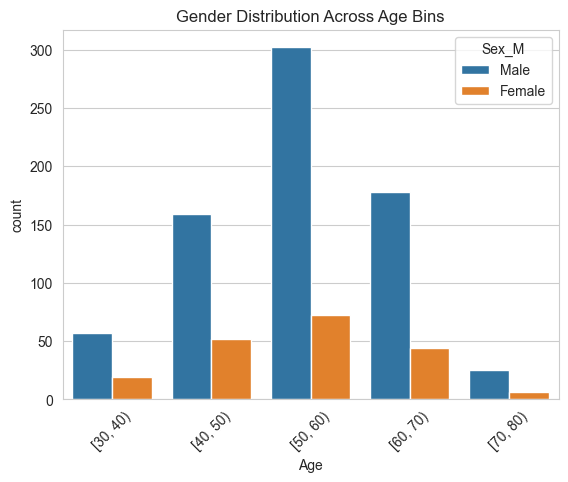

In [283]:
sns.countplot(
    x=pd.cut(df["Age"], bins=[30, 40, 50, 60, 70, 80], right=False),
    hue=df["Sex_M"].map({0: "Female", 1: "Male"})
)

plt.title("Gender Distribution Across Age Bins")
plt.xticks(rotation=45)
plt.show()

for all age groups males are greater than females.
78.97% participants being male

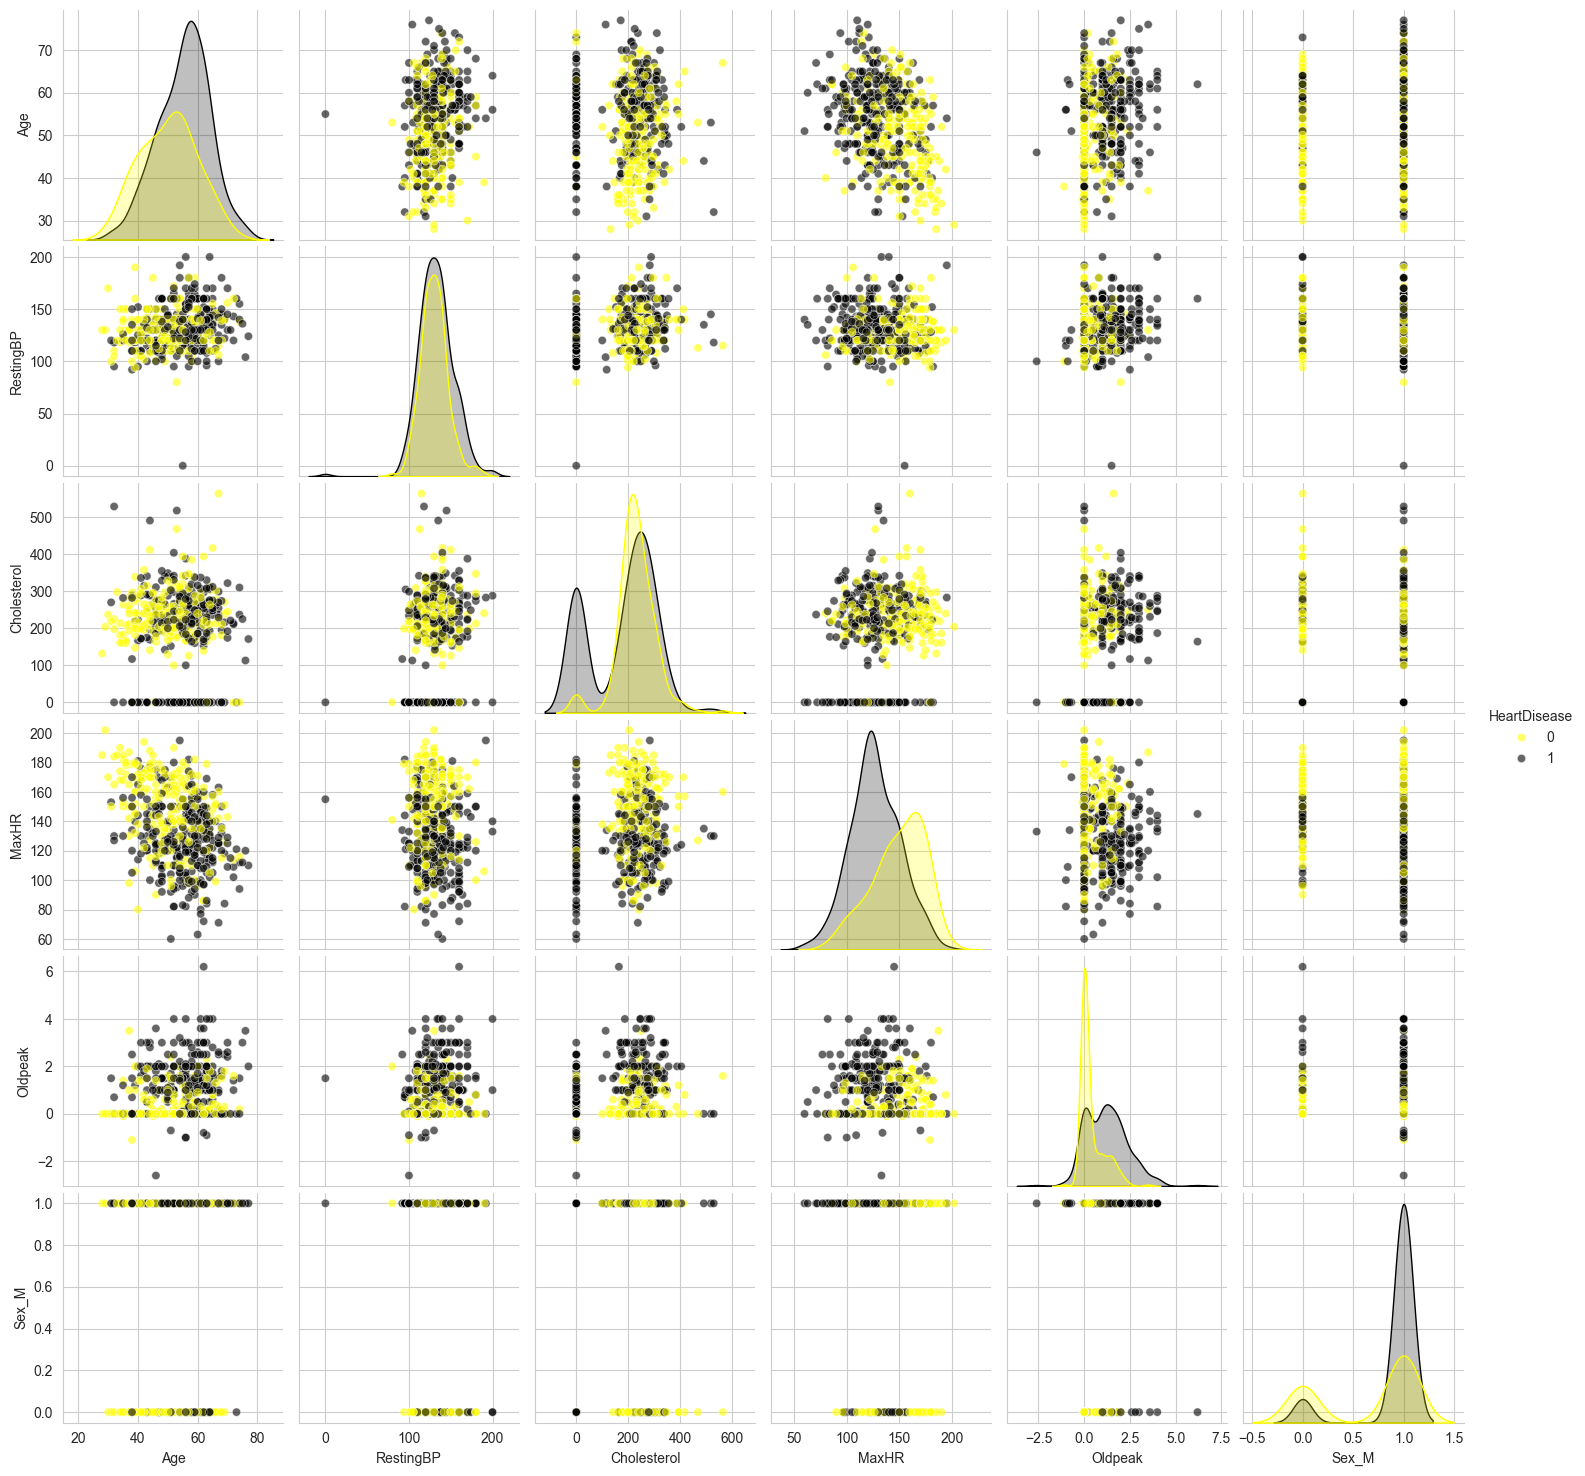

In [284]:
sns.pairplot(
    df.sample(500, random_state=42),
    vars=["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "Sex_M"],
    hue="HeartDisease",
    palette={
        0: "yellow",
        1: (0, 0, 0, 0.3)
    },
    diag_kind="kde",
    plot_kws={"alpha": 0.6}
)

plt.show()



In [285]:
df[df["Cholesterol"] == 0]["HeartDisease"].value_counts()


HeartDisease
1    152
0     20
Name: count, dtype: int64

In [286]:
df = df[df["Cholesterol"] != 0]


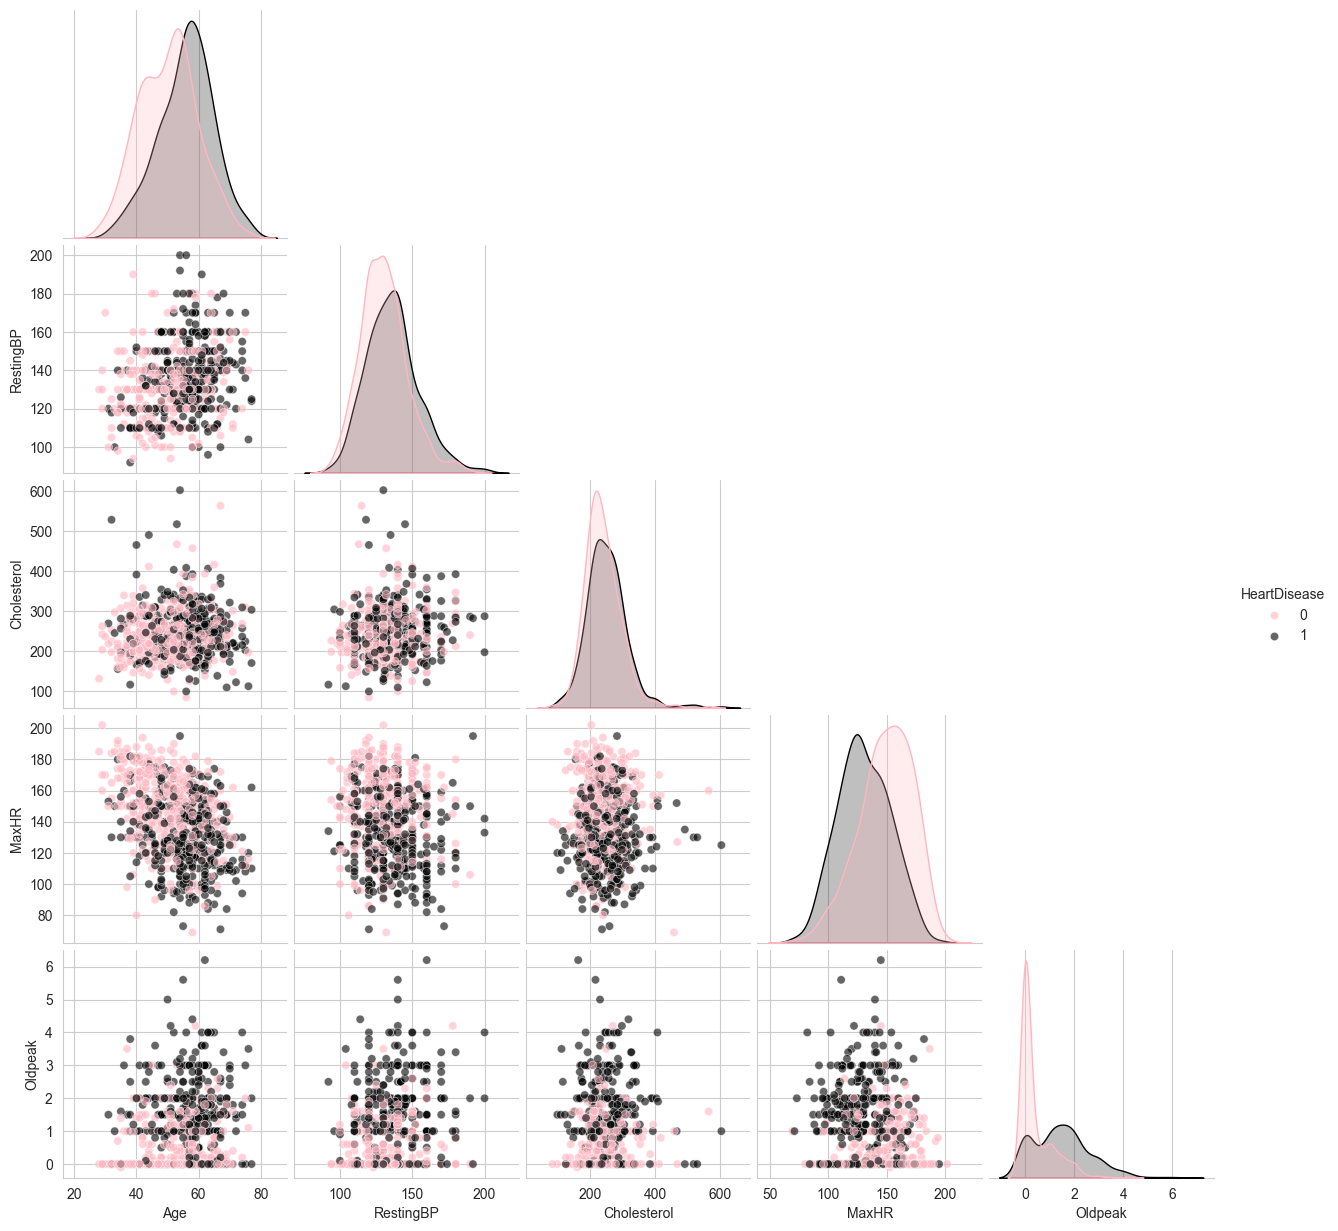

In [287]:
sns.pairplot(
    df,
    vars=["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"],
    hue="HeartDisease",
    palette={
        0: "lightpink",
        1: (0, 0, 0, 0.3)
    },
    diag_kind="kde",
    plot_kws={"alpha": 0.6},
    corner=True
)

plt.show()

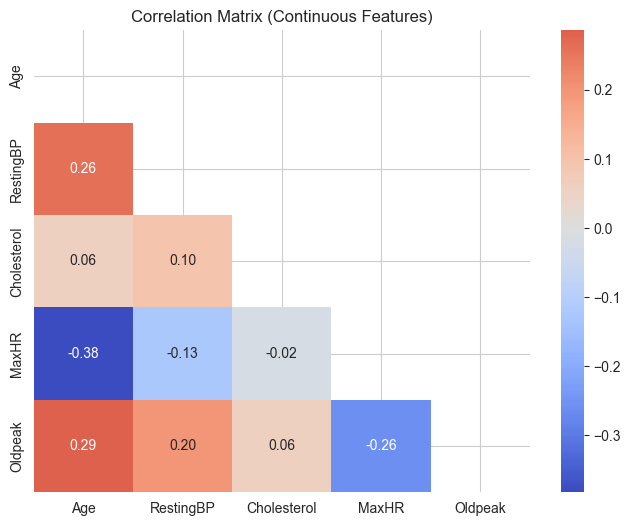

In [288]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[num_cols].corr(),
    mask = np.triu(np.ones_like( df[num_cols].corr(), dtype=bool)),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
)
plt.title("Correlation Matrix (Continuous Features)")
plt.show()


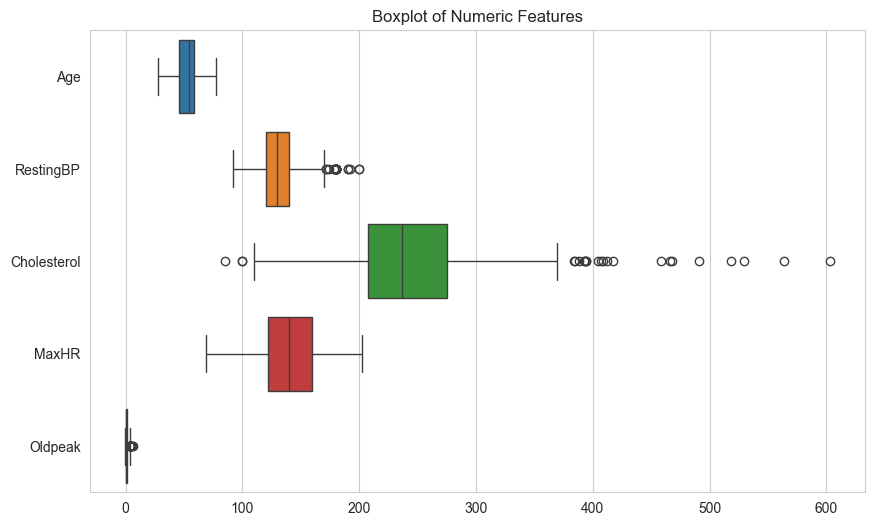

In [289]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols], orient="h")
plt.title("Boxplot of Numeric Features")
plt.show()

Applying winsorization(light outlier removal)

In [290]:
for col in num_cols:
    low, high = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(low, high)


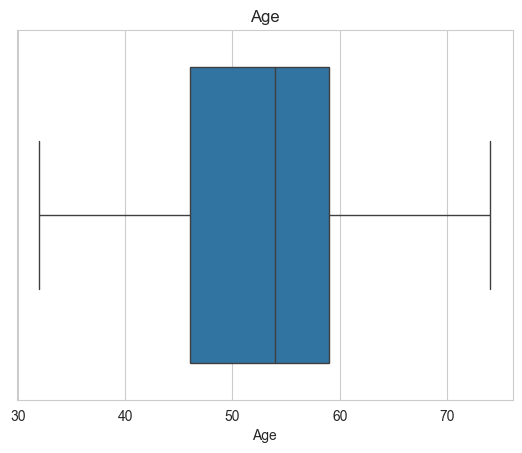

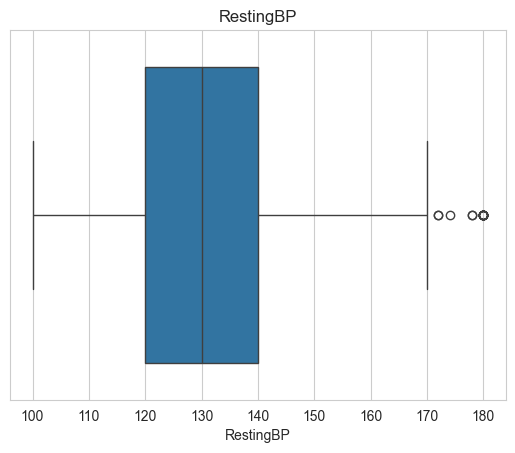

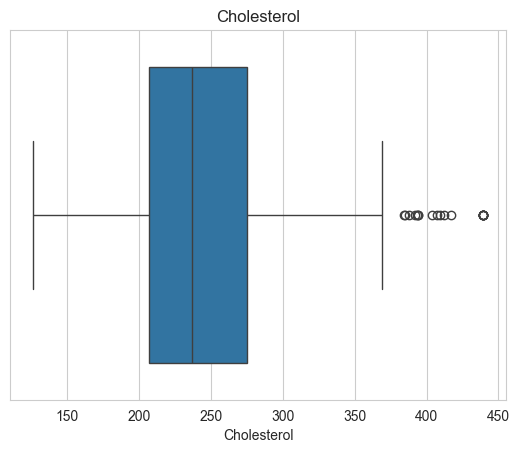

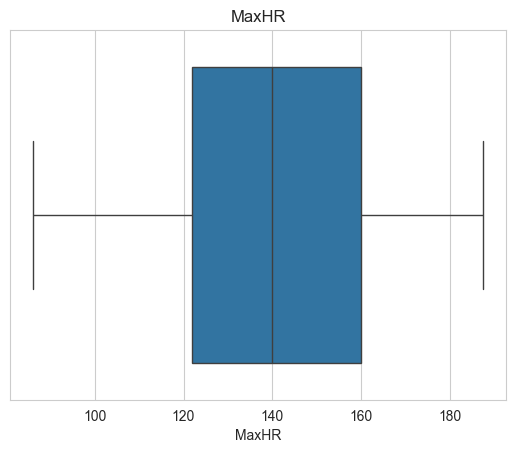

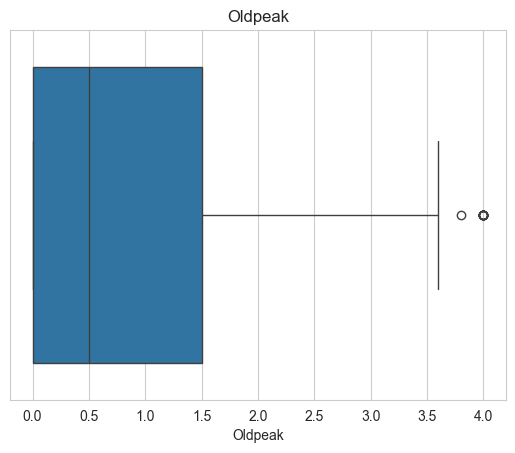

In [291]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [292]:
num_cols = [
    c for c in df.select_dtypes(include="number").columns
    if df[c].nunique() > 2
]

outlier_count = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    count = (
        (df[col] < Q1 - 1.5 * IQR) |
        (df[col] > Q3 + 1.5 * IQR)
    ).sum()

    outlier_count[col] = count

outlier_count


{'Age': np.int64(0),
 'RestingBP': np.int64(20),
 'Cholesterol': np.int64(20),
 'MaxHR': np.int64(0),
 'Oldpeak': np.int64(15)}

In [293]:
df.groupby("HeartDisease")[num_cols].median()


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
HeartDisease,,,,,
0,51.0,130.0,231.5,150.5,0.0
1,57.0,136.0,246.0,130.0,1.5


In [294]:
df.to_csv("heart_data_preprocessed.csv",index=False)

In [295]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.887399,132.961126,244.036729,0.167560,140.253887,0.894236,0.477212,0.756032,0.222520,0.226542,0.054960,0.596515,0.167560,0.384718,0.474531,0.467828
std,9.411013,16.898508,55.370120,0.373726,24.217497,1.045248,0.499816,0.429762,0.416218,0.418874,0.228055,0.490926,0.373726,0.486855,0.499686,0.499299
min,32.000000,100.000000,126.000000,0.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,74.000000,180.000000,439.550000,1.000000,187.550000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
